In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook



In [2]:
import numpy
import scipy
import scipy.optimize
import math
import random
import os
import sys

import matplotlib
import pylab as plt
import matplotlib.dates as mpd



### Earthquakes and Entropy
The principal objectives of this project are to examine the roles of thermal and Shannon "information" entropy, and similar arguments, in earthquake physics.

The equation for Shannon entropy is,

\begin{equation}
S = - \int p \left( x \right ) \log \left ( p \left ( x \right ) \right ) dx
\end{equation}

where $p(x)$ is the probability distribution and $x$ is an independent variable. For Shannon entropy, and information theory applications in general, stanadrd convention suggests that $\log = \log_2$. In practice, any log-base can be used; $\log_{10}$ is common in earthquake science and some astrophysics applications, and of course the latural log, $\log = \ln = \log_e$ is a robust convention and facilitates easy calculus.

Note that "entropy" and "information" can be evaluated with respect to any number of variables. For earthquakes, an obvious example is earthquake magnitude $m$, but some studies suggest that more information might be found by evaluating the probability distributions of earthquake *intervals*.

In this respect, we might find ourselves discussing the similarties and distinctions between "magnitude entropy" and "interval entropy". Similarly, we might find ways to evaluate entropy of slip-rate distributions, and other earthquake related quantities. A potentially important question might be, can entropy in one variable increase while entropy in another decrease? This might allude to some sort of information conservation or uncertainty princile important to earthquke predictability.

#### Magnitude Entropy
We first examine magnitude entropy, and so we start with the Gutenberg-Richter distribution. The cumulative, or "survivor" distribution can be written as,

\begin{equation}
log \left( N \left( > m \right ) \right ) = b \left ( m - m_c \right )
\end{equation}

The number density function, therefore, is

\begin{equation}
n(m) = \frac{dN}{dm} = \ln \left ( 10 \right ) b e^{ \ln \left ( 10 \right ) b (m - m_c)}
\end{equation}

This gives us the expected number of *observable*, $m>m_c$, earthquakes with magnitude $<m$. The inverse of this gives us the rate of $<m$ earthquakes per $m_c$ event,

\begin{equation}
P(m) = 1 - 10^{b \left ( m_c - m \right)}
\end{equation}

Taking the derivative of this, and for brevity making the substitution $\beta \equiv b \ln(10)$,

\begin{equation}
p(m) = \beta e^{\beta \left ( m_c - m \right)}
\end{equation}

#### Entropy Integration
The information entropy equation then becomes:

\begin{equation}
S = - \int_{m_1}^{m_2}{p(m) \cdot \ln \left ( m \right) dm}
\end{equation}

and so,

\begin{equation}
S = - \int_{m_1}^{m_2}{\beta e^{\beta(m_c-m)} \left[ \ln \left( \beta \right ) + \beta \left( m_c - m \right ) \right] dm}
\end{equation}

Extracting constants and regrouping,

\begin{equation}
S = - \beta e^{\beta m_c} \left[ \left( \ln \beta + \beta m_c \right) \int_{m_1}^{m_2}{e^{-\beta m} dm} - \int_{m_1}^{m_2}{m \cdot e^{-\beta m} dm} \right ]
\end{equation}

We can integrate this directly and by parts, where we recall and substitute:

\begin{equation}
\int{u \cdot dv} = uv - \int{v \cdot du}\\
u = m, dv = e^{-\beta m}\\
du = 1, v = {\frac{-1}{\beta}}e^{-\beta m}
\end{equation}

*NOTE: Check results from Wolfram; the indefinite form of the integral should be equivalent to:*

\begin{equation}
S = \ln \left ( \beta \right ) \cdot e^{\beta \left ( m_c - m \right )} - \left( \beta \left (m - m_c  \right ) + 1 \right ) \cdot e^{\beta \left (m_c - m \right )}\\
S = \left(  \ln \left ( \beta \right )  - \beta \left (m - m_c  \right ) - 1 \right ) \cdot e^{\beta \left (m_c - m \right )}\end{equation}

and we assume $m_1 = m_c$ and $m_2 = m$ is some upper limit that we have not yet determined. Pressing on,

\begin{equation}
S = - \beta e^{\beta m_c} \left[ \left( \ln \beta + \beta m_c \right) {\frac{-1}{\beta} \left(e^{-\beta m} - e^{-\beta m_c} \right ) } - \left( \left[m_c \cdot {\frac{-1}{\beta}}e^{-\beta m} - m_c \cdot {\frac{-1}{\beta}}e^{-\beta m_c}  \right] + \frac{1}{\beta^2} \left( e^{-\beta m_c} - e^{-\beta m} \right) \right ) \right ]
\end{equation}



The customary next step is to integrate from $m_1 = m_c$ to $m \to \infty$, so all of the $m$ terms go to zero exponentially, and gives us the suscinct result,

\begin{equation}
S = 1 - \ln \beta  ,
\end{equation}

and substituting $\beta = b \ln 10$ and solving for $S \to 0$ (from above)

\begin{equation}
\beta_0 = e \\
b_0 = \frac{e}{\ln 10}
b_0 \approx 1.18
\end{equation}

So first, we question the validity of this limit, $m \to \infty$. This can't be true, and in fact it is arguably a silly approximatin in the log/exponential scale. We routinely observe $m \approx 7$ earthquakes; the largest recorded event is the 1960 Chile earthquake at $m=9.5$, and there are reasonable arguments (like the splitting in half of the earth) for upper limits around $11 < m_{max} < 15$. Moreover, we have observed a scaling transition where $b=1.5$ for $m>7.6$ (or so) earthquakes (Yoder et al. 2012, Pacheco et al. 1992), so what happens if we consider finite bounds? We can solve for an upper limit; initially, assume $m_c = m_t \approx 7.6$, and then we can solve for some $m_{max}$ at the boundary $S \to 0$ (from above). We start with the substitution,

\begin{equation}
\beta_2 = b_2 \ln 10 \\
\beta_2 = 1.5 \cdot \ln 10 \approx 3.454
\end{equation}

A bit of algebra yields the indefinite form of the entropy integreal,

\begin{equation}
S_{indef} = e^{\beta \left ( m_c - m \right )} \cdot \left ( \ln \beta - \beta \left ( m - m_c \right ) - 1 \right ) - \ln \beta + 1
\end{equation}

One of our objectives now will (possibly) be to solve this for some maximum value of $m \to m_{max}$ for which $S = 0$. Note that this equation is transcendental, so this will be a numerical exercise.

##### Comment:
I believe what we find is that when we try to do this, we get a very small $\Delta m$, which appears to be an artifact in the near-field part of the integral -- which dips to some negative value and then increases. For $b>1.18$, $S$ approaches some value $S_{assymp} > 0$. To evaluate large magnitude scaling domains and possible maximum magnitudes, we take a somewhat different approach, using the assymptotic limits. See below for details.



b0:  1.1805347983576449
S_1:  0.16596755475204406
minsies:        fun: 0.05736072112704356
 hess_inv: array([[20454.89636551]])
      jac: array([-5.29596582e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([12.02824252]) [12.02824252]
diff:  -0.23950098356174565


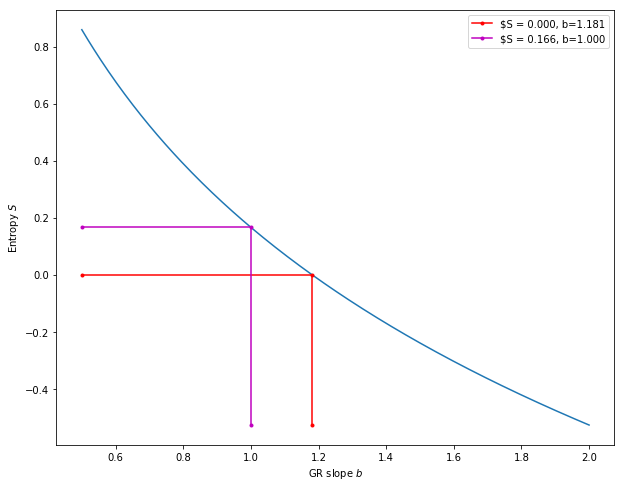

In [3]:
## #
def S_inf(b):
    # entropy equation, integrated to the limit m -> inf
    lt = numpy.log(10.)
    return 1. - numpy.log(b*lt)
#
def S_indef(m, b=1.5, mc=7.6, S0=0.):
    #
    # indefinite integral of entropy equation.
    beta = b*numpy.log(10.)
    #
    return numpy.exp(beta*(mc - m))*(numpy.log(beta) - beta*(m-mc) - 1.0) - numpy.log(beta) + 1. + S0
#
S_1 = S_inf(1.0)
b0 = numpy.exp(1.)/numpy.log(10)
#
print('b0: ', b0)
print('S_1: ', S_1)

#
X = numpy.linspace(.5,2.0, 250)
plt.figure(figsize=(10,8))
plt.clf()
ax=plt.gca()
#
ax.plot(X, S_inf(X), '-')
ax.plot([X[0], b0, b0], [S_inf(b0), S_inf(b0), S_inf(X[-1])], color='r', ls='-', marker='.',
        label='$S = {:.3f}, b={:.3f}'.format(S_inf(b0), b0))
ax.plot([X[0], 1., 1.], [S_inf(1.), S_inf(1.), S_inf(X[-1])], color='m', ls='-', marker='.',
       label='$S = {:.3f}, b={:.3f}'.format(S_inf(1.), 1.))

ax.set_xlabel('GR slope $b$')
ax.set_ylabel('Entropy $S$')
ax.legend(loc=0)
#
# use this lambda function to minimize entropy S (S_inndef() for a given upper magnitude m)
S_lambda = lambda m: S_indef(m, b=1.5, mc=7.6, S0=0.)**2.

minsies = scipy.optimize.minimize(S_lambda, x0=[8.] )
print('minsies: ', minsies, minsies.x)

print('diff: ', S_indef(minsies.x[0]))



Text(0, 0.5, 'Cumulative entropy $S$')

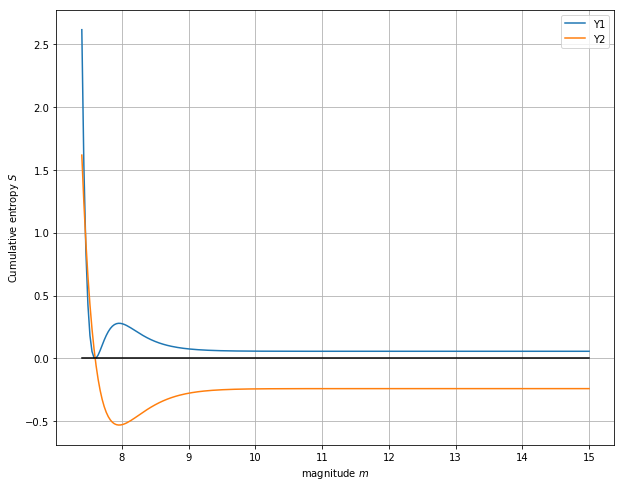

In [13]:
ms = numpy.linspace(7.4, 15, 250)
# NOTE:
# S_lambda = lambda m: S_indef(m, b=1.5, mc=7.6, S0=0.)**2.
#
#Y1 = [S_lambda(m) for m in ms]
Y1 = [S_indef(m, mc=7.6, b=1.5)**2 for m in ms]
Y2 = [S_indef(m, mc=7.6, b=1.5) for m in ms]
#
plt.figure(figsize=(10,8))
plt.clf()
ax=plt.gca()
#
ax.plot(ms, Y1, '-', label='Y1: Squared diff')
ax.plot(ms, Y2, '-', label='Y2: Signed diff')
ax.plot(ms, numpy.zeros(len(ms)), ls='-', color='k')
#
ax.grid()
ax.legend(loc=0)
ax.set_xlabel('magnitude $m$')
ax.set_ylabel('Cumulative entropy $S$')

Text(0, 0.5, 'Entropy $S$')

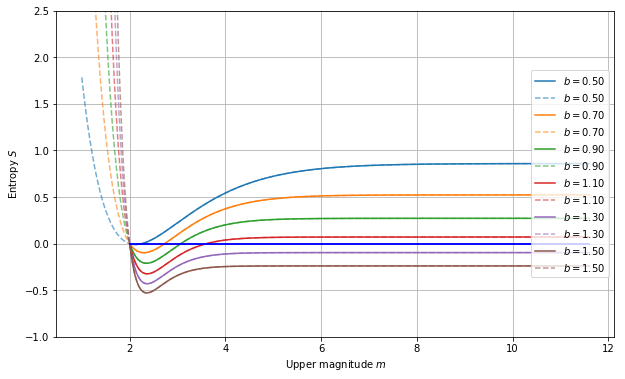

In [21]:
#
plt.figure(figsize=(10,6))
plt.clf()
ax=plt.gca()
ax.grid()
#j
mc=2.0
ms = numpy.linspace(mc, 11.6, 500)
ms2 = numpy.linspace(mc-1.0, 11.6, 500)


bs = numpy.arange(.5, 1.6, .2)
#for b in numpy.linspace(.4, 1.5, 6):
for b in bs:
    ln, = ax.plot(ms, [S_indef(m, mc=mc, b=b) for m in ms], ls='-', label='$b={:.2f}$'.format(b))
    clr = ln.get_color()
    ax.plot(ms2, [S_indef(m, mc=mc, b=b) for m in ms2], ls='--', color=clr, alpha=.6, label='$b={:.2f}$'.format(b))
ax.plot(ms, numpy.zeros(len(ms)), ls='-', color='b')
ax.legend(loc=0)
#
# plt.figure(figsize=(10,6))
# plt.clf()
# ax=plt.gca()
# ax.grid()
# what if m<mc ? eventually, we should look at the case mc -> -inf, or generalize to \Delta m,
#. or something like that.
#mc=0.
#ms = numpy.linspace(mc, 11.6, 500)
#ms2 = numpy.linspace(mc-1.0, 11.6, 500)
#for b in numpy.linspace(.4, 1.5, 6):
#for b in bs:
#    ax.plot(ms2, [S_indef(m, mc=mc, b=b) for m in ms], ls='--', alpha=.6, label='$b={:.2f}$'.format(b))
ax.plot(ms, numpy.zeros(len(ms)), ls='-', color='b')
ax.legend(loc='center right')
ax.set_ylim(-1, 2.5)
ax.set_xlabel('Upper magnitude $m$')
ax.set_ylabel('Entropy $S$')

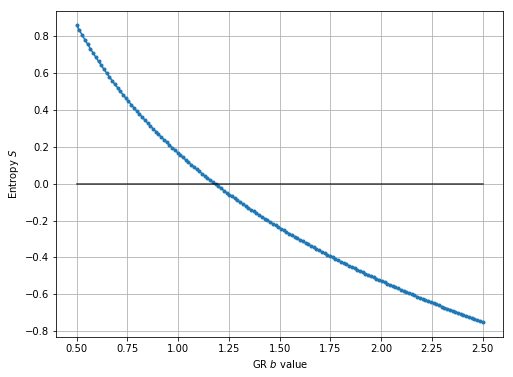

In [22]:
plt.figure(figsize=(8,6))
plt.clf()
ax=plt.gca()
#
bs = numpy.linspace(.5,2.5, 150)
Ss = [S_inf(b) for b in bs]
#
plt.plot(bs, Ss, '.-')
plt.plot(bs[0::len(bs)-1], [0., 0.], ls='-', marker='', color='k', alpha=.75)
ax.set_xlabel('GR $b$ value')
ax.set_ylabel('Entropy $S$')
ax.grid()
#
# so now, find S --> 0 pairs. there are smart ways to do this, with sorting, but we'll skip those for now,
# since we only need to compute a finite set.
#

Entropy deficit:: S_b1 = 0.16596755475204406, S_b2 = -0.23949755335612033, S_b1 + S_b2 = -0.07352999860407627
Deleta_m: 5.197366917521042 (12.697)


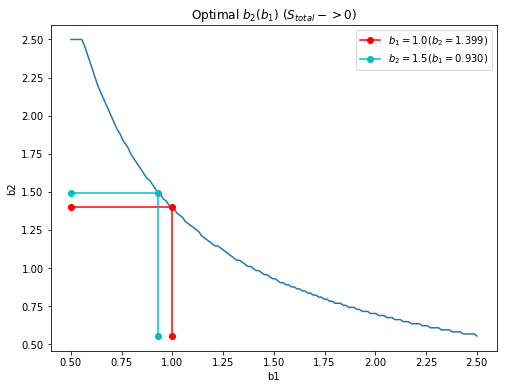

In [7]:
# block this out; figure out the list-comprehension syntax later:
pair_indices = []
bs2 = [[j,b] for j,b in enumerate(bs)]
#for k,b1 in enumerate(bs):
for k,b1 in bs2:
    # TODO: nominally, we're trying to pull the list indices from this, but since we're re-indexing
    #    each row, "j" is not consistent (i don't think -- i think this below line will return)
    #    a continuous list. to get the index, pre-compute the index (like the next line of code)
    #j0,b2 = min([[j,b] for j,b in enumerate(bs) if k!=j], key=lambda rw:(S_inf(b1)+S_inf(rw[1])))
    S1 = S_inf(b1)
    j0,b2,S2 = min([[j,b, S1+S_inf(b)] for j,b in bs2 if k!=j], key=lambda rw:rw[2]**2.)
    #print('***DEBUG: ({},{}) / ({},{} :: {}/{})'.format(k,b1,j0,b2, S2, S2**2.))
    pair_indices += [[k,j0,b1,b2, (b1+b2)**2.]]
#
pair_indices = numpy.array(pair_indices)

plt.figure(figsize=(8,6))
plt.clf()
ax=plt.gca()
#
ax.plot(pair_indices.T[2],pair_indices.T[3])
bb10 = min(pair_indices, key=lambda rw:(rw[2]-1.0)**2.)
bb15 = min(pair_indices, key=lambda rw:(rw[3]-1.5)**2.)
ax.plot([bb10[2], bb10[2], min(pair_indices.T[2])], [min(pair_indices.T[3]), bb10[3], bb10[3]],
        color='r',ls='-', marker='o', label='$b_1 = 1.0 (b_2={:.3f})$'.format(bb10[3]))
#ax.plot([min(pair_indices.T[2]), bb10[2]], [bb10[3], bb10[3]], color='b',ls='-', marker='o')
#
#ax.plot([bb15[2], bb15[2]], [min(pair_indices.T[3]), bb15[3]], color='m',ls='-', marker='o')
ax.plot([min(pair_indices.T[2]), bb15[2], bb15[2]], [bb15[3], bb15[3], min(pair_indices.T[3])],
        color='c',ls='-', marker='o', label='$b_2 = 1.5 (b_1={:.3f})$'.format(bb15[2]))

#
ax.legend(loc=0)
ax.set_xlabel('b1')
ax.set_ylabel('b2')
ax.set_title('Optimal $b_2(b_1)$ ($S_{total} -> 0$)')
#
m_t=7.5
m_min=0.

S_10 = S_inf(1.0)
S_15 = S_inf(1.5)
Delta_S_10_15 = S_10 + S_15
Delta_m2 = -S_10*(m_t-m_min)/S_15
print('Entropy deficit:: S_b1 = {}, S_b2 = {}, S_b1 + S_b2 = {}'.format(S_10, S_15,
                                                                        Delta_S_10_15))
print('Deleta_m: {} ({:.3f})'.format(Delta_m2, m_t+Delta_m2))

### Resolving (global) entropy deficit
- So if we start with a global catalog and follow Pacheco (1992), Yoder et al. (2012), Rundle (1989), and the general wisdom of the USGS --- for now, assume $b_1 = 1.0$, $b_2 = 1.5$, and $m_t \approx 7.6$ (but we'll get to how that factors in later). Also assume (and review Yoder et al. (2012) for details) that the $b_1 = 1.0$ domain extends to $m>1.5$ or maybe even $m=0$ -- this is an unimportant detail for now.
- Our entropy deficit is like:
  - $S_1 = 0.166$
  - $S_2 = -0.240$
  - $\Delta S \approx -.074$

- So we might look at smaller magnitude events, but my first recollection is that their slope is something like $b \approx 1.2$, which means $S \approx 0$, so for now let's assume we have these two finite domains.

- We will (attempt) to resolve the entropy deficit by computing the total entropy as a weighted average over the domain space,

\begin{equation}
S_{total} = \frac{\sum{S_k \cdot \Delta m_k}}{\sum{\Delta m_k}} ,
\end{equation}

where $\Delta m_k$ are the magnitude domains, and algebraic weights, for each scaling domain. For our simplified two-domain case,

\begin{equation}
S_{total} = \frac{S_1 \cdot \Delta m_1 + S_2 \cdot \Delta m_2}{\Delta m_1 + \Delta m_2} ,
\end{equation}

and of course, we are lookng for the limit where $S_{total} = 0$, so the only part we care about is,

\begin{equation}
S_{total} = {S_1 \cdot \Delta m_1 + S_2 \cdot \Delta m_2} = 0 .
\end{equation}

For now, assume $\Delta m_0 = 7.5$ (but we can trivially change this), and $\Delta m_2 = m_{max} - 7.5$; we will be solving for $m_{max}$, and again, we are not -- at this time, particularly worried about $0.1$ magnitude intervals; we just want a working framework to get us started.

Given these numbers, $m_t = 7.5$, and the slopes above, we get an estimated $m_{max} \approx 12.7$.





### Local (Large-) Magnitude Scaling:
- The debate rages on -- is $b=1$ a universal truth? Is $b$ best determined theoretically -- aka Rundle (1989), Yoder et al. (2012), etc., or purely empirically. Empirical solutions suggest $b \approx 0.8$ for California, and in general $0.7 < b < 1.2$ or so (though we should have some references to nail down those numbers).
- Based on the arguments above, it stands to reason that (maybe) systems with $b<1.18$ or so produce a positive entropy deficit, $S>0$, and that we can therefore expect a complimentary domain with steeper $b>1.18$ whose negative entropy, $S<0$, balances the excess produced in the first domain.
- There may also be a maximum allowable magnitude, as discussed above.
- Clearly, the entropy argument is not sufficient to fully solve this problem; one or more of the scaling domains transition magnitude(s) $m_t$, GR slopes $b_k$, etc. may need to be resolved by some other means.
- For now, let's use California with $b=0.8$ scaling as an example, and just to get started, let's assume there are neither upper nor lower limits to these domains, so we do not observe an entropy deficit between the large and small scaling domains (or equivalently, their domains are equal).
  - In other words, we don't know the slope of the steep scaling domain, so for now, we'll just assume continuity.
- So, for $b_1=0.8$, we get a corresponding large magnitude domain with $b_2 \approx 1.75$.
- Note that if we are expecting $b=1$, or even $b=1.5$, large events (we still need to define that "large" means $m>m_t$, whatever $m_t$ is) are extremely rare and could easily be mistaken for an exponential or even characteristic cut-off (see, again Yoder et al. (2012) and very importantly, Pacheco (1992) before it).

##### TODO:
- Start looking for a $b=1.75$ scaling domain in California?
- Maybe sort earthquakes by focal mechanism?
- Is there a clustering/data science way of doing this (quasi-) auto-magically?


In [8]:
b1 = .8
bb08 = min(pair_indices, key=lambda rw:(rw[2]-b1)**2.)
bb08b = min(pair_indices, key=lambda rw:(rw[3]-bb08[2])**2.)

print('b_08={:.4f}'.format(bb08[3]))
print('b_08\'={:.4f}'.format(bb08b[3]))

b_08=1.7483
b_08'=0.7953
